## Import libraries


In [2]:
import pandas as pd

import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data

In [3]:
# read files
unprocessed_df = pd.read_csv("../Data/US_videos.csv")
unprocessed_df.head()

# read json file
with open("../Data/US_category_id.json") as train_file:
    categories = json.load(train_file)["items"]

In [4]:
def get_category_id(categories):
    cat_dict = {}
    for cat in categories:
        cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    return cat_dict

cat_dict = get_category_id(categories)
unprocessed_df['category_name'] = unprocessed_df['category_id'].map(cat_dict)
unprocessed_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment


In [5]:
# iterating the columns 
for col in unprocessed_df.columns: 
    print(col)

#print(unprocessed_df['views'].mean())

video_id
trending_date
title
channel_title
category_id
publish_time
tags
views
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
video_error_or_removed
description
category_name


## function: encoding outcome: 

In [6]:
unprocessed_df['neutral']=unprocessed_df['views']-unprocessed_df['likes']-unprocessed_df['dislikes']
#print(unprocessed_df['neutral'])

In [16]:
def outcome(w1,w2,w3):
    #unprocessed_df['neutral']=unprocessed_df['views']-unprocessed_df['likes']-unprocessed_df['dislikes']
    y=w1*unprocessed_df['likes']+w2*unprocessed_df['neutral']+w3*unprocessed_df['dislikes']
    y_cat=pd.qcut(y,3,labels=["low", "medium", "high"])  
    return y_cat

print(outcome(1/3,1/3,1/3)) # equally important
#print(outcome(1/2,1/4,1/4)) # likes more important
#y1=outcome(1/3,1/3,1/3)
#y2=outcome(1/2,1/4,1/4)
#y3=outcome(1/2,3/8,1/8)

0        medium
1          high
2          high
3           low
4          high
          ...  
40944      high
40945    medium
40946    medium
40947      high
40948      high
Length: 40949, dtype: category
Categories (3, object): [low < medium < high]


## distribution of the outcome

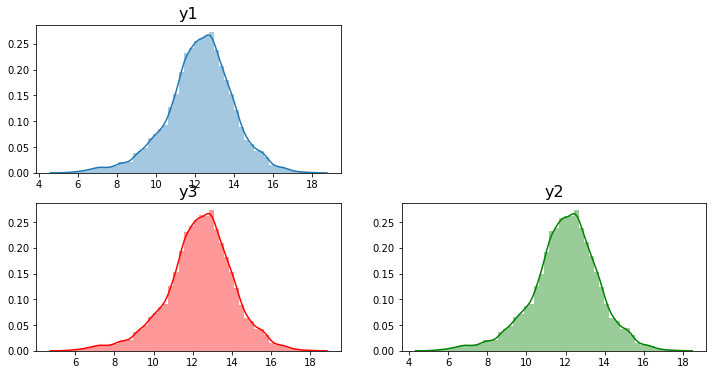

In [10]:
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(np.log(y1))
g1.set_title("y1", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(np.log(y2),color='green')
g2.set_title('y2', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(np.log(y3), color='r')
g3.set_title("y3", fontsize=16)

plt.show()


      